In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
#Removing Outliers using percentile technique 
lower_threshold, upper_threshold = df['price'].quantile([0.001,0.999])

In [8]:
#Filtering out the outliers
df_new =df[(df['price'] > lower_threshold) & (df['price'] < upper_threshold)]
df_new.shape


(13291, 9)

In [10]:
#Finding how many outliers are filtered out
df.shape[0] - df_new.shape[0]

29

In [11]:
# Now on a new dataframe using standard deviation to remove outliers
df.price.std()

148.9716737696744

In [12]:
#Using 4 standard deviation to remove outliers
low_thres = df.price.mean() - (4 * df.price.std())
upp_thres = df.price.mean() + (4 * df.price.std())

In [14]:
#Outlier are filtered out
df_std = df[(df.price > low_thres) & (df.price < upp_thres)]
df_std.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [17]:
#Finding the ouliers that were filtered out
outlier_df = df[(df.price < low_thres) | (df.price > upp_thres)]
outlier_df.shape

(107, 9)

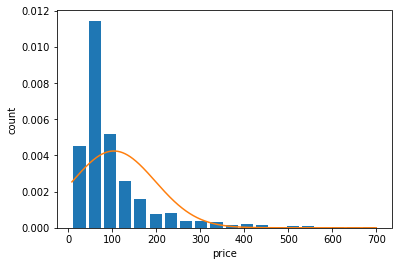

In [33]:
#Now plotting the new dataframe in histogram and drawing normal distribution 
#curve
plt.hist(df_std.price, bins = 20, rwidth = 0.8, density = True)
plt.xlabel("price")
plt.ylabel("count")

rng = np.arange(df_std.price.min(), df_std.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df_std.price.mean(), df_std.price.std()))


# Z_score is the same thing that we have done above using 4 standard deviation
#Z_score indicates how many standard deviations we are away from a data point
$$ z = (x - μ)/ σ $$
where x are datapoints and μ is mean and σ is standard deviation

In [41]:
# First finding the zscore and putting it as a column in our dataframe
df_std['z_score'] = (df_std['price'] - df_std['price'].mean()) / df_std['price'].std()
df_std.head()

C:\Users\WAQAR\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z_score
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.683645
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.176914
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.439822
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.088920
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.556789


In [45]:
df_no_outlier = df_std[(df_std['z_score'] > -3) & (df_std['z_score'] < 3)]
df_no_outlier.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z_score
4447,Super built-up Area,18-Jun,8th Phase JP Nagar,2 BHK,NaN,1080,2.0,2.0,35.00,-0.726923
3610,Plot Area,Ready To Move,Kyalasanahalli,4 Bedroom,UpowsMe,1200,4.0,3.0,110.00,0.070580
5702,Super built-up Area,Ready To Move,Whitefield,2 BHK,SSthamh,1180,2.0,2.0,41.00,-0.663123
334,Super built-up Area,Ready To Move,Ulsoor,3 BHK,K borja,2135,3.0,2.0,215.00,1.187085
7475,Super built-up Area,19-Mar,Hosa Road,2 BHK,Skume R,1040,2.0,1.0,68.59,-0.369748
